# Teleportation

In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.circuit.library import UGate
from qiskit.visualization import plot_histogram

from numpy import pi, random

In [35]:
qubit = QuantumRegister(1, "Q")

e_bit_a = QuantumRegister(1, "A")
e_bit_b = QuantumRegister(1, "B")

bit_a = ClassicalRegister(1, "a")
bit_b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, e_bit_a, e_bit_b, bit_a, bit_b)

protocol.h(e_bit_a)
protocol.cx(e_bit_a, e_bit_b)

protocol.barrier()

protocol.cx(qubit, e_bit_a)
protocol.h(qubit)

protocol.barrier()

protocol.measure(e_bit_a, bit_a)
protocol.measure(qubit, bit_b)

protocol.barrier()

with protocol.if_test((bit_a, 1)):
    protocol.x(e_bit_b)
with protocol.if_test((bit_b, 1)):
    protocol.z(e_bit_b)

In [36]:
display(protocol.draw())

░      ┌───┐ ░    ┌─┐ ░                                     »
  Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬═════════»
                                0  ║    └─────┘                ┌──╨──┐      »
b: 1/══════════════════════════════╩═══════════════════════════╡ 0x1 ╞══════»
                                   0                           └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [37]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

In [38]:
display(random_gate.to_matrix())

array([[-0.6658289 +0.j        ,  0.65298002+0.36095563j],
       [-0.10464731+0.73872919j, -0.40066704+0.53178383j]])

In [39]:
circuit = QuantumCircuit(qubit, e_bit_a, e_bit_b, bit_a, bit_b)

# circuit.x(qubit)

circuit.append(random_gate, qubit)

circuit.barrier()

circuit = circuit.compose(protocol)

circuit.barrier()

circuit.append(random_gate.inverse(), e_bit_b)

bit = ClassicalRegister(1, "r")

circuit.add_register(bit)

circuit.measure(e_bit_b, bit)

In [40]:
display(circuit.draw())

┌─────────────────────────┐ ░            ░      ┌───┐ ░    ┌─┐ ░         »
  Q: ┤ U(4.5988,1.7115,3.6466) ├─░────────────░───■──┤ H ├─░────┤M├─░─────────»
     └─────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░         »
  A: ────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────»
                                 ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── »
  B: ────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─┤ If-0  »
                                 ░      └───┘ ░            ░  ║  ║  ░ └──╥─── »
                                                              ║  ║    ┌──╨──┐ »
a: 1/═════════════════════════════════════════════════════════╩══╬════╡ 0x1 ╞═»
                                                              0  ║    └─────┘ »
b: 1/════════════════════════════════════════════════════════════╩════════════»
                                                                 0            »
r: 1/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                                            ░                               »
«  Q: ───────────────────────────────────────░───────────────────────────────»
«                                            ░                               »
«  A: ───────────────────────────────────────░───────────────────────────────»
«     ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ ┌────────────────────────────┐»
«  B: ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─┤ U(-4.5988,-3.6466,-1.7115) ├»
«     └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ └────────────────────────────┘»
«a: 1/══════════════════╬════════════════════════════════════════════════════»
«                    ┌──╨──┐                                                 »
«b: 1/═══════════════╡ 0x1 ╞═════════════════════════════════════════════════»
«                    └─────┘                                                 »
«r: 1/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«        
«  Q: ───
«        
«  A: ───
«     ┌─┐
«  B: ┤M├
«     └╥┘
«a: 1/═╬═
«      ║ 
«b: 1/═╬═
«      ║ 
«r: 1/═╩═
«      0

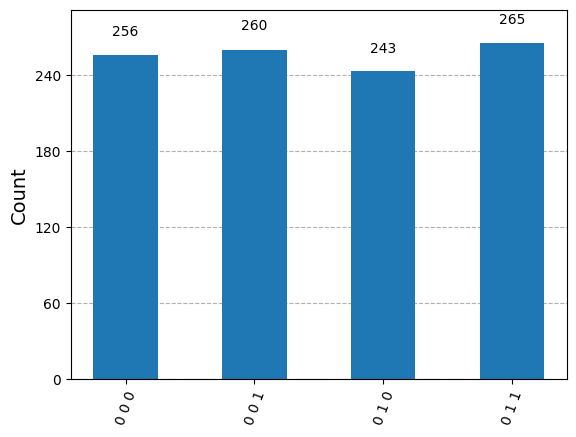

In [41]:
result = AerSimulator().run(circuit).result()

counts = result.get_counts()

display(plot_histogram(counts))